In [1]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from sklearn.metrics import f1_score



In [2]:
raw_data = pd.read_csv('../Data/santander-customer-transaction-prediction/train.csv')
raw_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
raw_data.dtypes.value_counts()

float64    200
object       1
int64        1
Name: count, dtype: int64

In [4]:
raw_data['target'].dtype

dtype('int64')

In [5]:
raw_data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [6]:
raw_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
raw_data.drop('ID_code', axis=1, inplace=True)

In [9]:
x = raw_data.drop(['target'], axis=1)
y = raw_data['target']

In [10]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
y_train.value_counts()

target
0    143992
1     16008
Name: count, dtype: int64

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


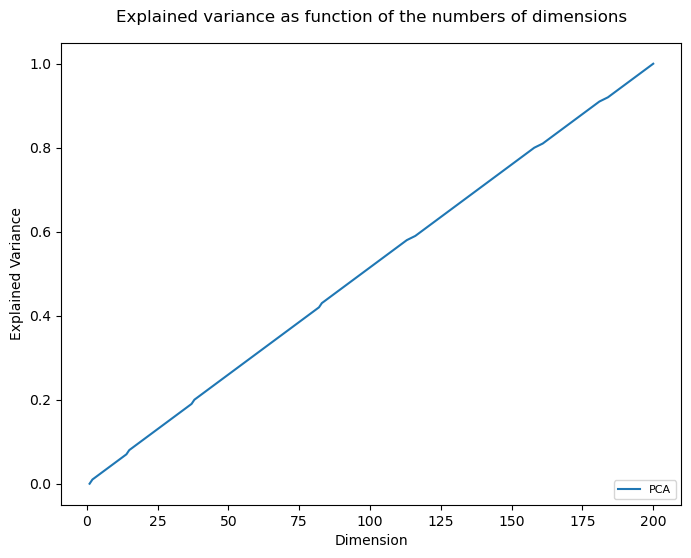

In [13]:
pca = PCA(random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
var_ratio_sum = np.cumsum(pca.explained_variance_ratio_)
threshold = np.arange(0.0, 1.01, 0.01, )
dimension = lambda threshold: np.argmax(var_ratio_sum>=threshold) + 1


plt.figure(figsize=(8, 6))
plt.plot([dimension(x) for x in threshold],threshold, label = 'PCA')
plt.title('Explained variance as function of the numbers of dimensions', pad=15)
plt.ylabel('Explained Variance')
plt.xlabel('Dimension')
plt.legend(loc="lower right", fontsize=8)
plt.show()

In [14]:
from sklearn.metrics import classification_report
#logistic regression with pca

logisticRegression = LogisticRegression(random_state=42, solver='lbfgs',
    n_jobs=-1,class_weight='balanced')
logisticRegression.fit(x_train_pca, y_train)

log_y_pre = logisticRegression.predict(x_test_pca)
log_y_proba = logisticRegression.predict_proba(x_test_pca)[:, 1]
log_confusion_matrix = confusion_matrix(y_test, log_y_pre)
log_accuracy = accuracy_score(y_test, log_y_pre)
log_f1_score = f1_score(y_test, log_y_pre, average='weighted')
log_pre = precision_score(y_test, log_y_pre, average='weighted')
log_recall = recall_score(y_test, log_y_pre, average='weighted')
log_roc_auc = roc_auc_score(y_test, log_y_proba)

print("Accuracy:", log_accuracy)
print("Confusion Matrix:\n", log_confusion_matrix)
print("F1 Score:", log_f1_score)
print("Precision Score:", log_pre)
print("Recall Score:", log_recall)
print("ROC AUC Score:", log_roc_auc)
print("Classification Report:\n", classification_report(y_test, log_y_pre))


Accuracy: 0.7802
Confusion Matrix:
 [[28012  7898]
 [  894  3196]]
F1 Score: 0.819018360152003
Precision Score: 0.8994410891742355
Recall Score: 0.7802
ROC AUC Score: 0.8630013978167369
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     35910
           1       0.29      0.78      0.42      4090

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



In [15]:
#SDGClassifier with PCA
sgd_clf = SGDClassifier( loss='log_loss',max_iter=200, tol =0.001, random_state=42)
sgd_clf.fit(x_train_pca, y_train)
sgd_clf_y_pred = sgd_clf.predict(x_test_pca)

svm_confusion_matrix = confusion_matrix(y_test, sgd_clf_y_pred)
svm_accuracy = accuracy_score(y_test, sgd_clf_y_pred)
svm_precision = precision_score(y_test, sgd_clf_y_pred)
svm_recall = recall_score(y_test, sgd_clf_y_pred)
svm_f1 = f1_score(y_test, sgd_clf_y_pred)
svm_y_proba = sgd_clf.predict_proba(x_test_pca)[:,1]
svm_roc_auc = roc_auc_score(y_test, svm_y_proba)

print("SVM confusion matrix: \n", svm_confusion_matrix)
print("SVM accuracy: ", svm_accuracy)
print("SVM precision: ", svm_precision)
print("SVM recall: ", svm_recall)
print("SVM f1: ", svm_f1)
print("SVM ROC-AUC: ", svm_roc_auc)
print(classification_report(y_test, sgd_clf_y_pred))


SVM confusion matrix: 
 [[35270   640]
 [ 2903  1187]]
SVM accuracy:  0.911425
SVM precision:  0.6496989600437876
SVM recall:  0.2902200488997555
SVM f1:  0.40121683285448706
SVM ROC-AUC:  0.8539943992009362
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35910
           1       0.65      0.29      0.40      4090

    accuracy                           0.91     40000
   macro avg       0.79      0.64      0.68     40000
weighted avg       0.90      0.91      0.90     40000



In [16]:
#RandomForest with PCA
randomForestClassifier = RandomForestClassifier(random_state=42, n_jobs = -1)
randomForestClassifier.fit(x_train_pca, y_train)
randomForestClassifier_y_pred = randomForestClassifier.predict(x_test_pca)

rf_confusion_matrix = confusion_matrix(y_test, randomForestClassifier_y_pred)
rf_accuracy = accuracy_score(y_test, randomForestClassifier_y_pred)
rf_precision = precision_score(y_test, randomForestClassifier_y_pred)
rf_recall = recall_score(y_test, randomForestClassifier_y_pred)
rf_f1 = f1_score(y_test, randomForestClassifier_y_pred)
log_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:,1]
roc_auc = roc_auc_score(y_test, log_y_proba)

print("rf confusion matrix: \n", rf_confusion_matrix)
print("rf accuracy: ", rf_accuracy)
print("rf precision: ", rf_precision)
print("rf recall: ", rf_recall)
print("rf f1: ", rf_f1)
print("rf ROC-AUC: ", roc_auc)
print(classification_report(y_test, randomForestClassifier_y_pred))


rf confusion matrix: 
 [[35549   361]
 [ 3177   913]]
rf accuracy:  0.91155
rf precision:  0.716640502354788
rf recall:  0.2232273838630807
rf f1:  0.34041759880686057
rf ROC-AUC:  0.856276299278487
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35910
           1       0.72      0.22      0.34      4090

    accuracy                           0.91     40000
   macro avg       0.82      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000



In [17]:
xgb_model = xgb.XGBClassifier(
    booster='gbtree',                   
    objective='binary:logistic',                              
    learning_rate=0.5,
    n_estimators=500,                   
    subsample=1,                        
    colsample_bytree=1.0,                                                               
    random_state=42,
    gamma = 0,
    scale_pos_weight=len(y_train) / (2 * np.bincount(y_train)[1])          
    ) 
xgb_model.fit(x_train_pca, y_train)
xgbrf_y_pred = xgb_model.predict(x_test_pca)

xgbrf_confusion_matrix = confusion_matrix(y_test, xgbrf_y_pred)
xgbrf_accuracy = accuracy_score(y_test, xgbrf_y_pred)
xgbrf_precision = precision_score(y_test, xgbrf_y_pred)
xgbrf_recall = recall_score(y_test, xgbrf_y_pred)
xgbrf_f1 = f1_score(y_test, xgbrf_y_pred)
xgbrf_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:,1]
xgbrf_roc_auc = roc_auc_score(y_test, xgbrf_y_proba)

print("rf confusion matrix: \n", xgbrf_confusion_matrix)
print("rf accuracy: ", xgbrf_accuracy)
print("rf precision: ", xgbrf_precision)
print("rf recall: ", xgbrf_recall)
print("rf f1: ", xgbrf_f1)
print("rf ROC-AUC: ", xgbrf_roc_auc)
print(classification_report(y_test, xgbrf_y_pred))


rf confusion matrix: 
 [[34635  1275]
 [ 2555  1535]]
rf accuracy:  0.90425
rf precision:  0.5462633451957295
rf recall:  0.3753056234718826
rf f1:  0.4449275362318841
rf ROC-AUC:  0.856276299278487
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     35910
           1       0.55      0.38      0.44      4090

    accuracy                           0.90     40000
   macro avg       0.74      0.67      0.70     40000
weighted avg       0.89      0.90      0.90     40000



In [18]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.119477)
2. feature 51 (0.005834)
3. feature 172 (0.005752)
4. feature 9 (0.005693)
5. feature 59 (0.005460)
6. feature 76 (0.005413)
7. feature 146 (0.005397)
8. feature 31 (0.005392)
9. feature 150 (0.005370)
10. feature 133 (0.005325)
11. feature 41 (0.005316)
12. feature 46 (0.005296)
13. feature 10 (0.005267)
14. feature 100 (0.005239)
15. feature 134 (0.005235)
16. feature 19 (0.005230)
17. feature 96 (0.005223)
18. feature 129 (0.005212)
19. feature 177 (0.005207)
20. feature 109 (0.005175)
21. feature 114 (0.005135)
22. feature 11 (0.005079)
23. feature 37 (0.005041)
24. feature 163 (0.004995)
25. feature 62 (0.004982)
26. feature 174 (0.004967)
27. feature 158 (0.004953)
28. feature 91 (0.004897)
29. feature 26 (0.004888)
30. feature 7 (0.004886)
31. feature 186 (0.004856)
32. feature 72 (0.004848)
33. feature 169 (0.004839)
34. feature 33 (0.004838)
35. feature 197 (0.004832)
36. feature 152 (0.004828)
37. feature 162 (0.004816)
38. feature 86 

In [19]:
importances = randomForestClassifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.205693)
2. feature 34 (0.004428)
3. feature 187 (0.004412)
4. feature 50 (0.004394)
5. feature 9 (0.004383)
6. feature 123 (0.004329)
7. feature 150 (0.004322)
8. feature 173 (0.004299)
9. feature 74 (0.004298)
10. feature 139 (0.004284)
11. feature 128 (0.004271)
12. feature 131 (0.004265)
13. feature 100 (0.004264)
14. feature 115 (0.004258)
15. feature 197 (0.004252)
16. feature 45 (0.004251)
17. feature 193 (0.004247)
18. feature 140 (0.004246)
19. feature 29 (0.004209)
20. feature 11 (0.004207)
21. feature 143 (0.004206)
22. feature 166 (0.004204)
23. feature 19 (0.004203)
24. feature 98 (0.004197)
25. feature 57 (0.004193)
26. feature 106 (0.004192)
27. feature 168 (0.004185)
28. feature 22 (0.004181)
29. feature 65 (0.004180)
30. feature 73 (0.004178)
31. feature 174 (0.004165)
32. feature 90 (0.004163)
33. feature 164 (0.004162)
34. feature 85 (0.004158)
35. feature 68 (0.004153)
36. feature 76 (0.004150)
37. feature 37 (0.004141)
38. feature 16

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', LogisticRegression(random_state=41, n_jobs = -1)),
                ('rf', RandomForestClassifier(random_state=41, n_jobs = -1)),
                ('sgd',SGDClassifier(random_state=41, n_jobs = -1)),
                ('xgb', XGBClassifier(booster='gbtree',random_state=41))], final_estimator=RandomForestClassifier(random_state=43, n_jobs = -1),cv=3)
stacking_clf.fit(x_train_pca, y_train)
stacking_clf_y_ped = stacking_clf.predict(x_test_pca)

stacking_clf_confusion_matrix = confusion_matrix(y_test, stacking_clf_y_ped)
stacking_clf_accuracy = accuracy_score(y_test, stacking_clf_y_ped)
stacking_clf_precision = precision_score(y_test, stacking_clf_y_ped)
stacking_clf_recall = recall_score(y_test, stacking_clf_y_ped)
stacking_clf_f1 = f1_score(y_test, stacking_clf_y_ped)
stacking_clf_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:,1]
stacking_clf_roc_auc = roc_auc_score(y_test, xgbrf_y_proba)

print("rf confusion matrix: \n", rf_confusion_matrix)
print("rf accuracy: ", stacking_clf_accuracy)
print("rf precision: ", stacking_clf_precision)
print("rf recall: ", stacking_clf_recall)
print("rf f1: ", stacking_clf_f1)
print("rf ROC-AUC: ", stacking_clf_roc_auc)
print(classification_report(y_test, stacking_clf_y_ped))
